<a href="https://colab.research.google.com/github/sarang-dj/Network-_knights-/blob/main/my_first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **My First ML Project**


## **load data**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### **loading dataset and visualize signals**

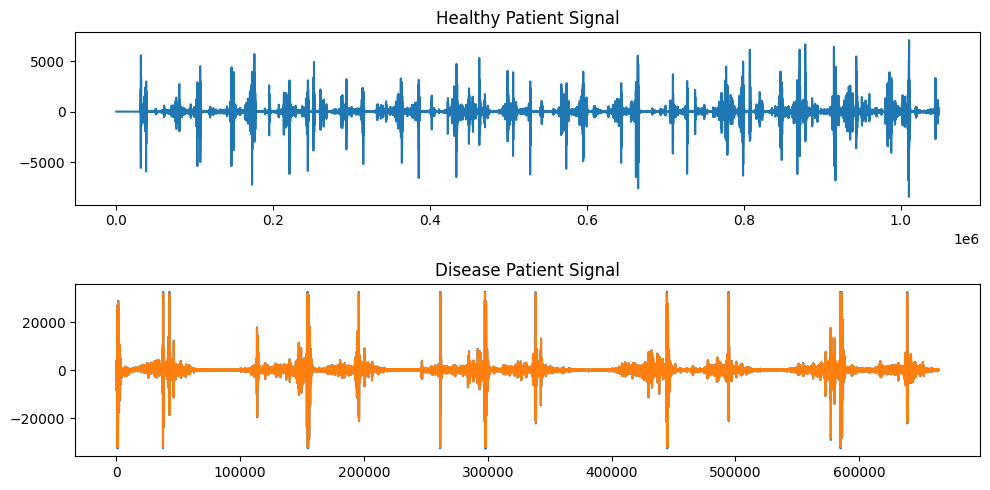

SVM Accuracy: 0.0
Random Forest Accuracy: 0.0
Neural Network Accuracy: 0.0
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
patient_healthy= np.loadtxt('/content/drive/MyDrive/ColabNotebooks/HEALTHY.txt')
patient_unhealthy = np.loadtxt('/content/drive/MyDrive/ColabNotebooks/UNHEALTHY.txt')
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(patient_healthy, label='Healthy Patient')
plt.title('Healthy Patient Signal')
plt.subplot(2, 1, 2)
plt.plot(patient_unhealthy, label='Disease Patient')
plt.title('Disease Patient Signal')
plt.tight_layout()
plt.show()
from scipy.signal import butter, lfilter

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Apply low-pass filter to signals
fs = 1000  # Sampling frequency
cutoff_frequency = 50  # Adjust as needed
filtered_healthy = butter_lowpass_filter(patient_healthy, cutoff_frequency, fs)
filtered_disease = butter_lowpass_filter(patient_unhealthy, cutoff_frequency, fs)
from scipy.fft import fft

# Time domain features
mean_healthy = np.mean(filtered_healthy)
variance_healthy = np.var(filtered_healthy)

mean_disease = np.mean(filtered_disease)
variance_disease = np.var(filtered_disease)

# Frequency domain features using Fourier Transform
fft_healthy = np.abs(fft(filtered_healthy))
fft_disease = np.abs(fft(filtered_disease))
from sklearn.model_selection import train_test_split

X = np.vstack((mean_healthy, variance_healthy, mean_disease, variance_disease))
y = np.array([0, 0, 1, 1])  # 0 for healthy, 1 for disease

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train models
svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
nn_predictions = nn_model.predict(X_test)

# Evaluate models
svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
nn_accuracy = accuracy_score(y_test, nn_predictions)

print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Neural Network Accuracy:", nn_accuracy)

print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print("Neural Network Classification Report:\n", classification_report(y_test, nn_predictions))
